In [2]:
import traffic
import pandas as pd 
from traffic.core import Traffic
from biblio_herramienta.herramienta import *
from biblio_herramienta.tratardatos import *

In [3]:
carpetaDatos = r'datos_sectores/' # carpeta que contiene los datos
nombreDatos = "datos_filtrados.csv" 

In [4]:
"""
def cargardatosfiltrados(carpeta,nombre_datos):
    # carga los datos descargados desde una carpeta 
    datos_cargados = Traffic.from_file(carpeta+nombre_datos)
    Var_time = ["hour", "last_position", "timestamp"]
    datos_cargados.data[Var_time] = datos_cargados.data[Var_time] = datos_cargados.data[Var_time].astype("datetime64[ns, UTC]")
    return datos_cargados
# estas funciones son necesarias para poder prersentar los datos
"""
vuelos = cargardatosfiltrados(carpetaDatos,nombreDatos)


In [5]:
vuelos.data.head()

,altitude,callsign,groundspeed,icao24,latitude,longitude,timestamp,track
0,38000.0,BEL204,456.0,44cccf,43.124503,-5.675485,2019-02-05 02:12:25+00:00,36.794475
1,38000.0,BEL204,456.0,44cccf,43.125916,-5.674055,2019-02-05 02:12:26+00:00,36.794475
2,38000.0,BEL204,455.0,44cccf,43.128067,-5.671884,2019-02-05 02:12:27+00:00,36.693681
3,38000.0,BEL204,455.0,44cccf,43.129904,-5.669992,2019-02-05 02:12:28+00:00,36.693681
4,38000.0,BEL204,455.0,44cccf,43.131317,-5.668562,2019-02-05 02:12:29+00:00,36.693681


In [6]:
vuelos

count
icao24 callsign       
4ca60f IBK5BV     3683
4cace5 IBK6054    2974
       IBK6055    2343
49514c TAP434M    2175
344495 GES381L    2052
4cacc6 RYR3PE     2036
4853d1 TRA6845    1926
4cabae RYR4Z      1886
3c56f7 EWG4TP     1814
4ca8da RYR6BM     1805

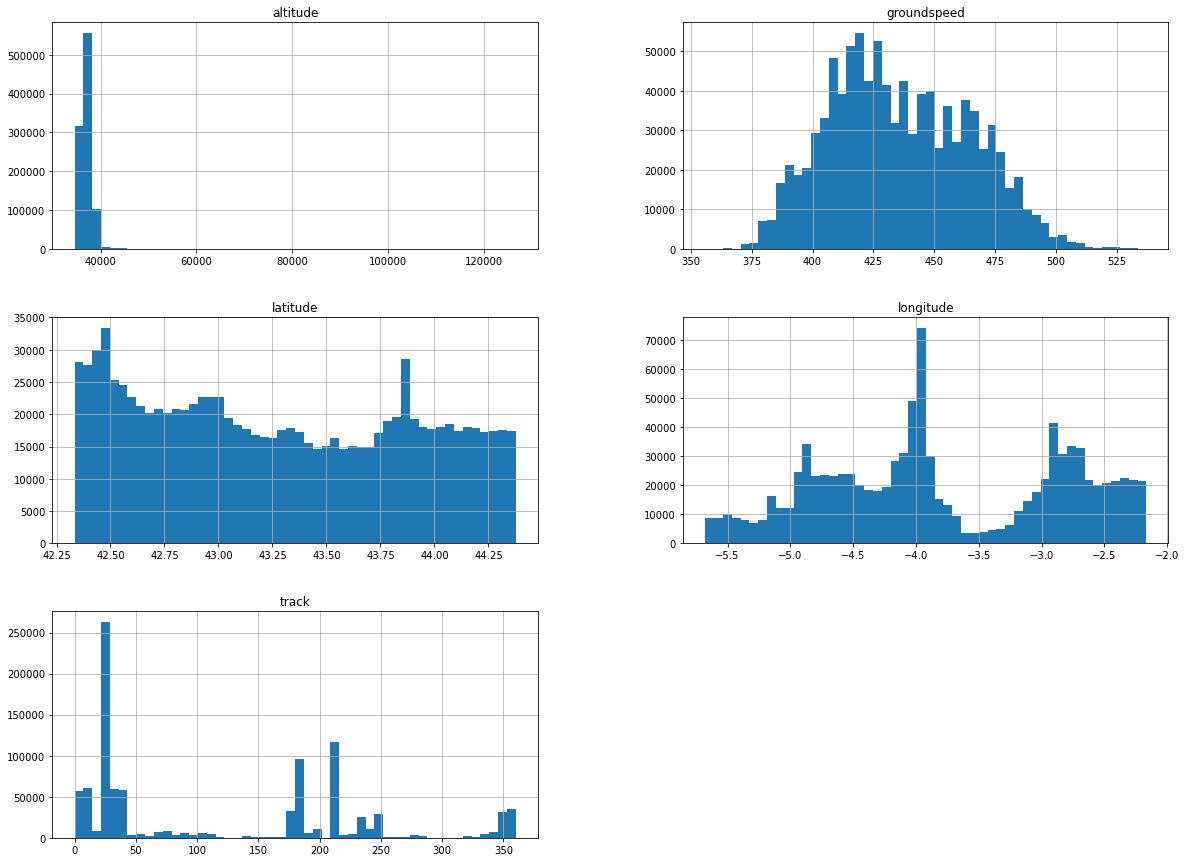

In [8]:
import matplotlib.pyplot as plt
vuelos.data.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
vuelos2.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111087 entries, 0 to 2111086
Data columns (total 17 columns):
 #   Column         Dtype              
---  ------         -----              
 0   Unnamed: 0     int64              
 1   alert          bool               
 2   altitude       float64            
 3   callsign       object             
 4   geoaltitude    float64            
 5   groundspeed    float64            
 6   hour           datetime64[ns, UTC]
 7   icao24         object             
 8   last_position  datetime64[ns, UTC]
 9   latitude       float64            
 10  longitude      float64            
 11  onground       bool               
 12  spi            bool               
 13  squawk         float64            
 14  timestamp      datetime64[ns, UTC]
 15  track          float64            
 16  vertical_rate  float64            
dtypes: bool(3), datetime64[ns, UTC](3), float64(8), int64(1), object(2)
memory usage: 231.5+ MB


Ahora, se van elimar las columnas que no son útiles para el algoritmo:
* 0   Unnamed: 0     983196 non-null  int64                         
* 2   alert          983196 non-null  bool                  
* 5   geoaltitude    983196 non-null  float64                  
* 7   hour           983196 non-null  datetime64[ns, UTC]       
* 9   last_position  983196 non-null  datetime64[ns, UTC]          
* 12  onground       983196 non-null  bool               
* 13  spi            983196 non-null  bool               
* 14  squawk         983196 non-null  float64                     
* 17  vertical_rate  983196 non-null  float64  

In [17]:
vuelos_ncol = vuelos2.data.drop(["Unnamed: 0","alert","geoaltitude",'hour','last_position','onground','spi','squawk','vertical_rate'],axis = 1)


,altitude,callsign,groundspeed,icao24,latitude,longitude,timestamp,track
0,36000.0,FPO1364,391.0,396668,42.334791,-3.236176,2019-02-05 02:10:20+00:00,11.654737
1,36000.0,FPO1364,391.0,396668,42.336467,-3.235665,2019-02-05 02:10:21+00:00,11.654737
2,36000.0,FPO1364,391.0,396668,42.336467,-3.235665,2019-02-05 02:10:22+00:00,11.654737
3,36000.0,FPO1364,391.0,396668,42.338376,-3.235154,2019-02-05 02:10:23+00:00,11.654737
4,36000.0,FPO1364,391.0,396668,42.338376,-3.235154,2019-02-05 02:10:24+00:00,11.654737
...,...,...,...,...,...,...,...,...
2111082,31000.0,SWR92,478.0,4b191c,42.337305,-3.717211,2019-02-07 23:27:40+00:00,246.817163
2111083,31000.0,SWR92,478.0,4b191c,42.336467,-3.719958,2019-02-07 23:27:41+00:00,246.817163
2111084,31000.0,SWR92,478.0,4b191c,42.335678,-3.722430,2019-02-07 23:27:42+00:00,246.817163
2111085,31000.0,SWR92,478.0,4b191c,42.334465,-3.726218,2019-02-07 23:27:43+00:00,246.817163


In [19]:
vuelos_ncol.info()
vuelos_ncol_p = Traffic(vuelos_ncol)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111087 entries, 0 to 2111086
Data columns (total 8 columns):
 #   Column       Dtype              
---  ------       -----              
 0   altitude     float64            
 1   callsign     object             
 2   groundspeed  float64            
 3   icao24       object             
 4   latitude     float64            
 5   longitude    float64            
 6   timestamp    datetime64[ns, UTC]
 7   track        float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(2)
memory usage: 128.9+ MB


count
icao24 callsign       
344409 VLG1571    4721
       VLG15GE    4630
4ca60f IBK5BV     4052
344649 BCS372     3901
344409 VLG15SR    3855
       VLG15NT    3816
44d1d1 TAY414N    3456
345206 VLG1434    3440
ae0401 DUKE59     3436
344495 GES381L    3420

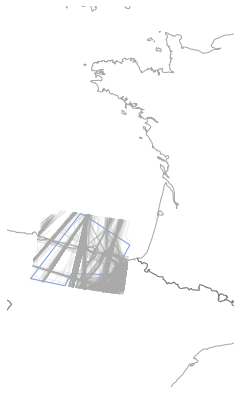

In [8]:
representarSobreSector(vuelos_ncol_p )

In [1]:
from traffic.data.samples import switzerland

In [3]:
switzerland.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139098 entries, 0 to 139097
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   timestamp      139098 non-null  datetime64[ns, UTC]
 1   altitude       139098 non-null  float64            
 2   callsign       139098 non-null  object             
 3   groundspeed    139098 non-null  float64            
 4   icao24         139098 non-null  object             
 5   latitude       139098 non-null  float64            
 6   longitude      139098 non-null  float64            
 7   track          139098 non-null  float64            
 8   vertical_rate  139098 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(2)
memory usage: 9.6+ MB
